In [1]:
####################################################################
# Packages & Libraries #############################################
####################################################################

import matplotlib.pyplot as plt

from matplotlib import colors
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%run '[ 1 ] Search.py'


-------------------

# [ 1 ] Initialize

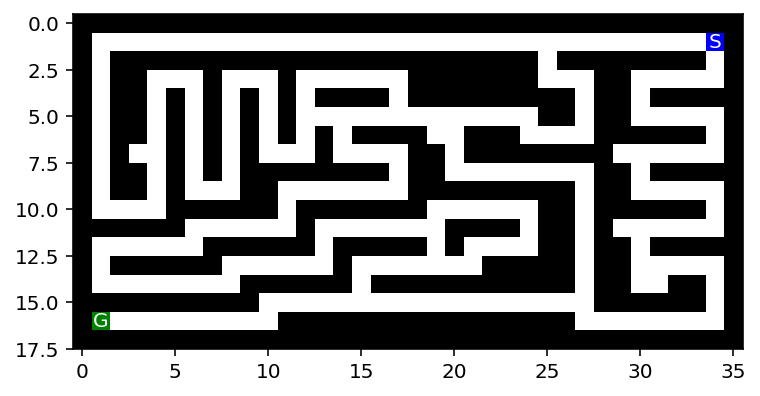

In [2]:
flag = True
myMaze = "medium_maze.txt"

# 1. Select Maze [txt] file
maze_str = selectMaze(myMaze)

# 2. [Convert] String Maze --> Numpy Array
maze = convert_Maze2Array(maze_str)

# 3. Pretty Print Array (Maze)
if flag: show_maze(maze)


--------------------------------

# [ 2 ] Test Helper Functions

In [3]:
if flag:

    print("********** Create Root Node **********")
    root = NODE(position=(0,0), parent=None, action=None, cost=0)
    print("Root:", root)
    print("Root (ref):", repr(root))


    print()
    print("********** 'East & Cost [1]' from Parent node (Head) **********")
    node2 = NODE(position=(0,1), parent=root, action="E", cost=1)
    print("Node2:", node2)
    print("[Parent/Head] Node2: ", node2.parent)
    print("[Parent/Head] Node2 (ref): ", repr(node2.parent))
    # Note: -1 is used because passing root to getrefcount adds one reference
    print("Root is now ref'ed x2. Ref count for garbage collection (Root Node):", sys.getrefcount(root)-1)

    print()
    print("Note that the root node is safe from garbage collection as long as we have also a ref in Node2")
    root = None
    print(root)
    print("[Parent/Head] Node2 (ref root node): ", repr(node2.parent))
    print("Ref count for garbage collection (root node):", sys.getrefcount(node2.parent)-1)

    print()
    print("********** Path: Root --> Node2 **********")
    print("Path from root to node2")
    path = node2.getPathFromRoot()
    print("References:", path)
    print("Positions:", [n.position for n in path])
    print("Actions:", [n.action for n in path])
    print("Cost:", [n.cost for n in path])


    print()
    print("Once node2 ref is deleted, the ref count for all nodes goes to zero & the whole tree is exposed to garbage collection.")
    node2 = None

********** Create Root Node **********
Root: NODE - position = (0, 0); action = None; cost = 0
Root (ref): <__main__.NODE object at 0x7f7fe0195e80>

********** 'East & Cost [1]' from Parent node (Head) **********
Node2: NODE - position = (0, 1); action = E; cost = 1
[Parent/Head] Node2:  NODE - position = (0, 0); action = None; cost = 0
[Parent/Head] Node2 (ref):  <__main__.NODE object at 0x7f7fe0195e80>
Root is now ref'ed x2. Ref count for garbage collection (Root Node): 2

Note that the root node is safe from garbage collection as long as we have also a ref in Node2
None
[Parent/Head] Node2 (ref root node):  <__main__.NODE object at 0x7f7fe0195e80>
Ref count for garbage collection (root node): 1

********** Path: Root --> Node2 **********
Path from root to node2
References: [<__main__.NODE object at 0x7f7fe0195e80>, <__main__.NODE object at 0x7f7fb5e2c610>]
Positions: [(0, 0), (0, 1)]
Actions: [None, 'E']
Cost: [0, 1]

Once node2 ref is deleted, the ref count for all nodes goes to ze


-----------------------------

# [ 3 ] Test Search Algorithms

Path length: 69
Reached squares: 265
CPU times: user 74.1 ms, sys: 4.6 ms, total: 78.8 ms
Wall time: 89.8 ms


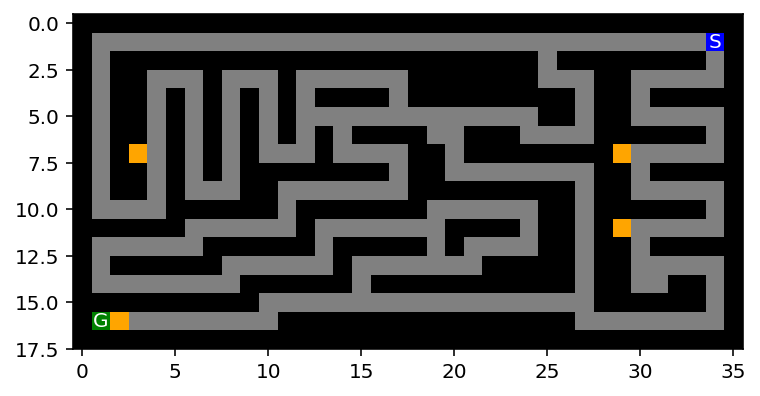

In [4]:
%time result = BreadthFirstSearch(maze, debug=False, visualize=False)
show_maze(maze)